# MNIST Fashion Classification
Dataset yang digunakan adalah data baju dengan dimensi 28 x 28 x 1.

![title](img/fashion.png)

## Kelas:
Kelas terbadi menjadi 10 kelas yang berbeda yang masing - masing direpresentasikan oleh 10 index angka yang berbeda:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 

## Diagram
![title](img/diagram.png)

## Cara kerja Conv Layer & Pooling Layer
![title](img/cnnworks.gif)

## CNN
![title](img/cnn.png)


## Flowchart
Flowchart arsitektur CNN
![title](img/flowchart.jpeg)

In [10]:
# IMPORT LIBRARY
import numpy as np
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
# DOWNLOAD DATASET
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

train_x = np.reshape(train_x, (len(train_x), 28, 28, 1))
test_x = np.reshape(test_x, (len(test_x), 28, 28, 1))

train_y = to_categorical( train_y )
test_y = to_categorical( test_y )

In [12]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

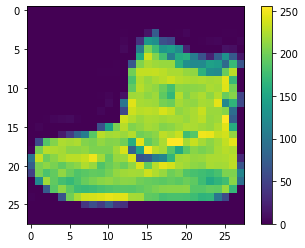

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [72]:
# Feature Extraction Layer
inputs = Input(shape=(28, 28, 1))
conv_layer = ZeroPadding2D(padding=(2,2))(inputs) 
conv_layer = Conv2D(64, (5, 5), strides=(3,3), activation='relu')(conv_layer) 
conv_layer = MaxPooling2D((2, 2))(conv_layer) 
conv_layer = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(conv_layer) 
conv_layer = ZeroPadding2D(padding=(1,1))(conv_layer) 
conv_layer = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(conv_layer)
conv_layer = ZeroPadding2D(padding=(1,1))(conv_layer) 
conv_layer = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(conv_layer)

In [73]:
# Flatten feature map to Vector with 576 element.
flatten = Flatten()(conv_layer) 

# Fully Connected Layer
fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(200, activation='relu')(fc_layer)
fc_layer = Dense(156, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)
fc_layer = Dense(56, activation='relu')(flatten)
fc_layer = Dense(14, activation='relu')(fc_layer)
outputs = Dense(10, activation='softmax')(fc_layer)

model = Model(inputs=inputs, outputs=outputs)

# Adam Optimizer and Cross Entropy Loss
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Print Model Summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 64)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)          36928     
__________

In [74]:
# Use TensorBoard
callbacks = TensorBoard(log_dir='./Graph')

# Train for 100 Epochs and use TensorBoard Callback
model.fit(train_x, train_y, batch_size=1000, epochs=10, verbose=1, validation_data=(test_x, test_y), callbacks=[callbacks])

# Save Weights
model.save_weights('weights.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/step - loss: 2.1874 - acc: 0.2250 - val_loss: 1.9331 - val_acc: 0.3349
Epoch 2/10
60000/60000 [==============================] - 8s 140us/step - loss: 1.5147 - acc: 0.5079 - val_loss: 1.1445 - val_acc: 0.6555
Epoch 3/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.9472 - acc: 0.7032 - val_loss: 0.8250 - val_acc: 0.7204
Epoch 4/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.7629 - acc: 0.7378 - val_loss: 0.7247 - val_acc: 0.7478
Epoch 5/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.6867 - acc: 0.7576 - val_loss: 0.6731 - val_acc: 0.7631
Epoch 6/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.6449 - acc: 0.7702 - val_loss: 0.6394 - val_acc: 0.7755
Epoch 7/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.6164 - acc: 0.7791 - val_loss: 0.6200 - 

In [75]:
history = model.predict(test_x)

Kelas: Dress
Keyakinan: 0.8965418


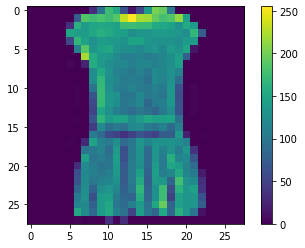

In [76]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index = 100
max_predict = np.amax(history[index])
kelas = 0
for i in history[index]:
    if(max_predict == i):
        print("Kelas: "+str(class_names[kelas]))
        print("Keyakinan: "+str(max_predict))
        kelas_fix = kelas
        break
    kelas += 1
    
plt.figure()
plt.imshow(train_images[kelas_fix])
plt.colorbar()
plt.grid(False)
plt.show()